In [1]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd 
import uproot
from datetime import datetime
from FlightTracker import FlightTracker
tracker = FlightTracker('2023-05-12 00:00:00')

In [3]:
file = uproot.open("header/" + 'station11_run2214_header.root')

NameError: name 'uproot' is not defined

In [2]:
f1 = tracker.get_flight_by_index(1)

INFO:runtable_database:database connection to RNOG_live established


station11_run2214_header.root


ValueError: cannot mmap an empty file

In [2]:
tracker.flights_distinct


,index,flightnumber,date,filename,mintime,maxtime,min_r
0,0,THY8JK,2023-05-12,2023.05.13-051443.db,2023-05-12 07:05:09.600000,2023-05-12 07:11:06.400000,24.8
1,1,THY76Y,2023-05-12,2023.05.13-051443.db,2023-05-12 07:24:30.300000,2023-05-12 07:25:30.600000,148.1
2,2,THY8MT,2023-05-12,2023.05.13-051443.db,2023-05-12 11:12:41.800000,2023-05-12 11:18:43.600000,27.6
3,3,THY73G,2023-05-12,2023.05.13-051443.db,2023-05-12 11:19:18.800000,2023-05-12 11:25:15.500000,27.7
4,4,SAS931,2023-05-12,2023.05.13-051443.db,2023-05-12 11:19:43.900000,2023-05-12 11:25:15.500000,56.4
5,5,DAL143,2023-05-12,2023.05.13-051443.db,2023-05-12 11:57:24.900000,2023-05-12 11:58:25.200000,148.0
6,6,OCN72,2023-05-12,2023.05.13-051443.db,2023-05-12 12:40:07.300000,2023-05-12 12:46:14.100000,27.4
7,7,DLH456,2023-05-12,2023.05.13-051443.db,2023-05-12 13:06:20.000000,2023-05-12 13:11:56.600000,57.6
8,8,DAL179,2023-05-12,2023.05.13-051443.db,2023-05-12 13:17:18.200000,2023-05-12 13:23:25.000000,72.8
9,9,DLH490,2023-05-12,2023.05.13-051443.db,2023-05-12 13:37:34.100000,2023-05-12 13:43:50.900000,27.6


In [3]:
f1 = tracker.get_flight_by_index(1)

AttributeError: 'DataFrame' object has no attribute 'flightnumer'

"2023-05-12T12:40:07" "2023-05-12T12:46:14" duration: 0:06:07 [s]
OCN72   


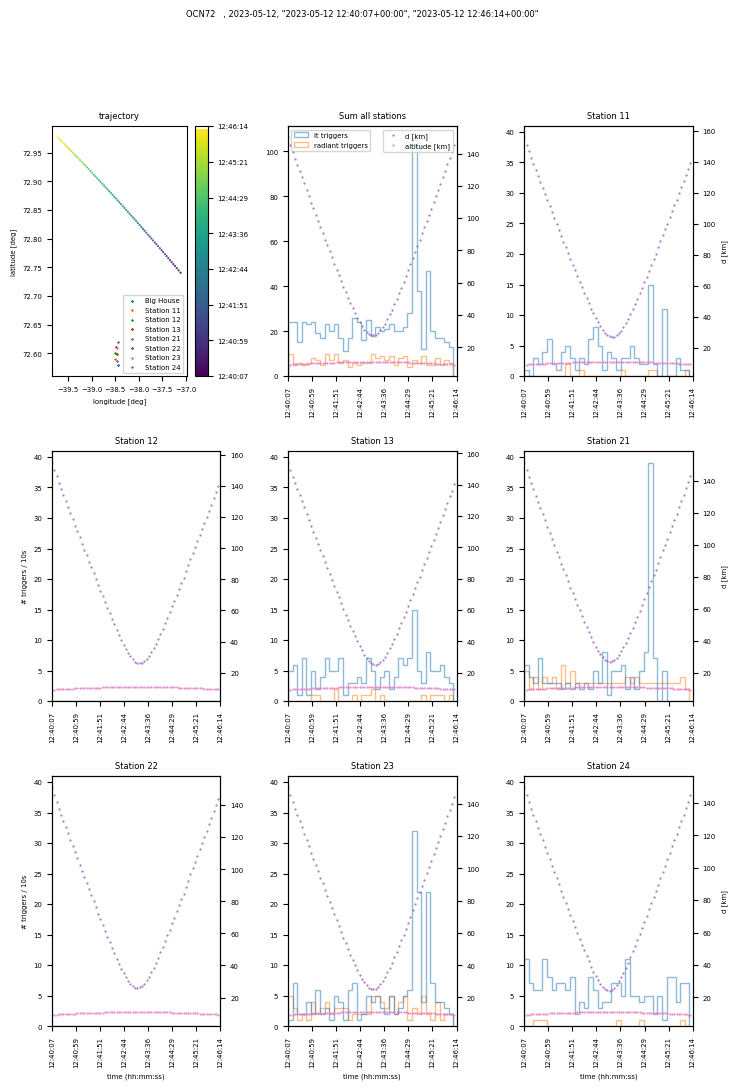

In [8]:
tracker.plot_flight(6)

In [6]:

'''
tracker.flights_distinct = tracker.flights_distinct.query('minr2 < 30')
df = pd.DataFrame(['trigger_distances'])
for i in range(len(tracker.flights_distinct)):
    t = tracker.flights_distinct
    start_time = t.mintime.iloc[i][:19] # [:19] to throw away potential microseconds
    stop_time = t.maxtime.iloc[i][:19] # [:19] to throw away potential microseconds
    start_time = FlightTracker.utc.localize(datetime.strptime(start_time, FlightTracker.fmt))
    stop_time = FlightTracker.utc.localize(datetime.strptime(stop_time, FlightTracker.fmt))

    flightnumber = t.flightnumber.iloc[i]
    print(i, ' ', flightnumber)

    f = tracker.flights.query(f"readtime_utc >= '{datetime.strftime(start_time, FlightTracker.fmt)}' & readtime_utc <= '{datetime.strftime(stop_time, FlightTracker.fmt)}' & flightnumber == '{flightnumber}' ").copy()
    times = pd.to_datetime(f.readtime_utc, format='ISO8601').astype('int64') / 10**9
    r = np.sqrt(f.r2)

    header_df = FlightTracker.get_runtable(start_time, stop_time)

    temp_df = pd.DataFrame()
    temp_df['trigger_distances'] = FlightTracker.part_lin(header_df[(times.min() <= header_df.trigger_time) & (header_df.trigger_time <= times.max())].trigger_time, times, r)
    
    df = pd.concat([df, temp_df], ignore_index=True)



plt.hist(df.trigger_distances, bins = 50)
;
'''

'\ntracker.flights_distinct = tracker.flights_distinct.query(\'minr2 < 30\')\ndf = pd.DataFrame([\'trigger_distances\'])\nfor i in range(len(tracker.flights_distinct)):\n    t = tracker.flights_distinct\n    start_time = t.mintime.iloc[i][:19] # [:19] to throw away potential microseconds\n    stop_time = t.maxtime.iloc[i][:19] # [:19] to throw away potential microseconds\n    start_time = FlightTracker.utc.localize(datetime.strptime(start_time, FlightTracker.fmt))\n    stop_time = FlightTracker.utc.localize(datetime.strptime(stop_time, FlightTracker.fmt))\n\n    flightnumber = t.flightnumber.iloc[i]\n    print(i, \' \', flightnumber)\n\n    f = tracker.flights.query(f"readtime_utc >= \'{datetime.strftime(start_time, FlightTracker.fmt)}\' & readtime_utc <= \'{datetime.strftime(stop_time, FlightTracker.fmt)}\' & flightnumber == \'{flightnumber}\' ").copy()\n    times = pd.to_datetime(f.readtime_utc, format=\'ISO8601\').astype(\'int64\') / 10**9\n    r = np.sqrt(f.r2)\n\n    header_df = F